## **Анализ данных и визуализация**

In [69]:
import pandas as pd

In [5]:
data = pd.read_csv("adult.csv");

Из кода ниже видно что некоторые данные пустые

In [6]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Если вывести количество пустых значений то мы видим что пустых значений нет, потому что пустые значения заменены шаблонным значением "?"

In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Посмотрим какие значения принимает столбец "workclass". Можно заметить что столбец принимает 2799 "пустых" значений. Посмотрим статистику по всем столбцам

In [9]:
data[["workclass"]].value_counts()

workclass       
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64

In [10]:
[data[data[x] == "?"][x].count() for x in data.axes[1]]

[0, 2799, 0, 0, 0, 0, 2809, 0, 0, 0, 0, 0, 0, 857, 0]

In [11]:
[data[data[x] != "?"][x].count() for x in data.axes[1]]

[48842,
 46043,
 48842,
 48842,
 48842,
 48842,
 46033,
 48842,
 48842,
 48842,
 48842,
 48842,
 48842,
 47985,
 48842]

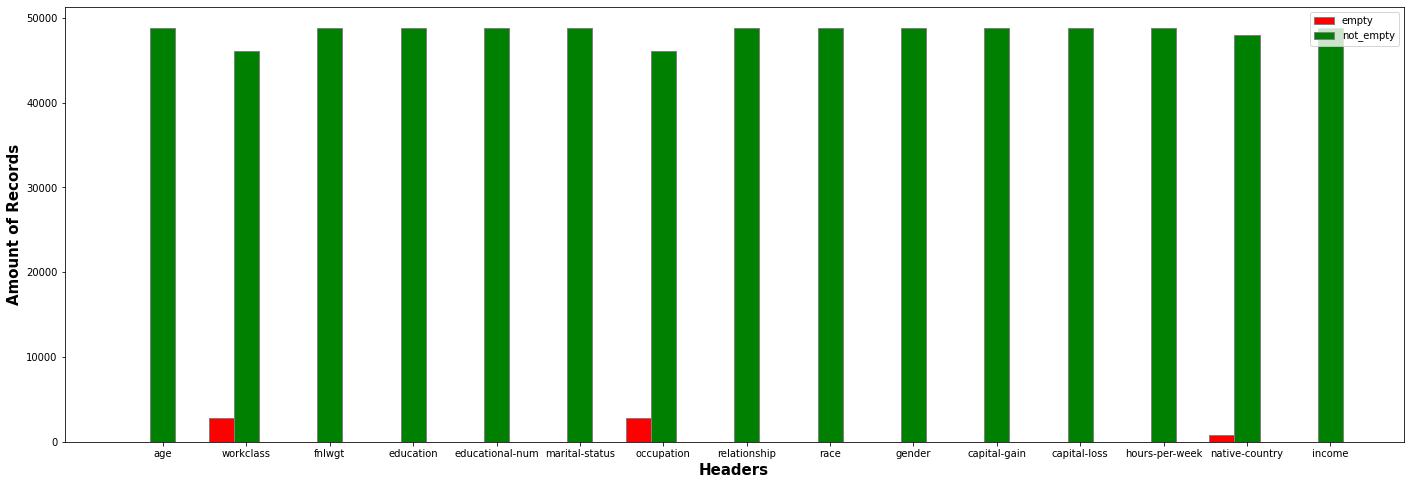

In [12]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.3
fig = plt.subplots(figsize =(24, 8))

empty = [data[data[x] == "?"][x].count() for x in data.axes[1]]
not_empty = [data[data[x] != "?"][x].count() for x in data.axes[1]]

br1 = np.arange(len(not_empty))
br2 = [x + barWidth for x in br1]

plt.bar(br1, empty, color ='r', width = barWidth,
		edgecolor ='grey', label ='empty')
plt.bar(br2, not_empty, color ='g', width = barWidth,
		edgecolor ='grey', label ='not_empty')

plt.xlabel('Headers', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of Records', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(empty))], data.axes[1])

plt.legend()
plt.show()


По результатам таблицы видно что количество пустых значений не так уж и велико как могло показаться в начале. Поэтому можно не заменять пустые значения на среднее или частотное, а просто удалить их.

Заменяем значения "?" на Nan 

In [13]:
data = data.replace("?", np.NaN)

Отбираем все значения которые не null и сохраняем их в clean_data. Проверим на столбце "workclass" что нулевых значений больше нет

In [14]:
clean_data = data[~data.isnull().any(axis=1)]
clean_data["workclass"].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

Выведем количество уникальных стран

In [15]:
clean_data["native-country"].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Создадим список из датасетов разделенных по Странам (промежуточное значение)

In [16]:
dfs_by_country = [clean_data[clean_data["native-country"] == x]  for x in clean_data["native-country"].unique()]
dfs_by_country[0]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Из предыдущего датасета для каждой страны найдем количество записей в которых доход меньше 50к и больше 50к и объеденим эти значения в список по всем странам.

In [17]:
incomes_by_country = [(x[x["income"] == "<=50K"]["income"].count(), x[x["income"] != "<=50K"]["income"].count()) for x in dfs_by_country]
incomes_by_country

[(30844, 10448),
 (41, 4),
 (83, 3),
 (856, 47),
 (92, 5),
 (26, 10),
 (135, 58),
 (199, 84),
 (24, 5),
 (60, 9),
 (136, 11),
 (155, 20),
 (76, 7),
 (83, 18),
 (78, 4),
 (58, 31),
 (85, 62),
 (17, 9),
 (65, 16),
 (19, 2),
 (72, 47),
 (99, 34),
 (30, 25),
 (67, 33),
 (103, 60),
 (50, 12),
 (77, 36),
 (45, 3),
 (17, 2),
 (34, 22),
 (18, 2),
 (89, 14),
 (37, 6),
 (15, 8),
 (12, 6),
 (20, 8),
 (31, 18),
 (24, 2),
 (21, 1),
 (20, 16),
 (1, 0)]

Построим график зарплат по странам. По графику видно что значения

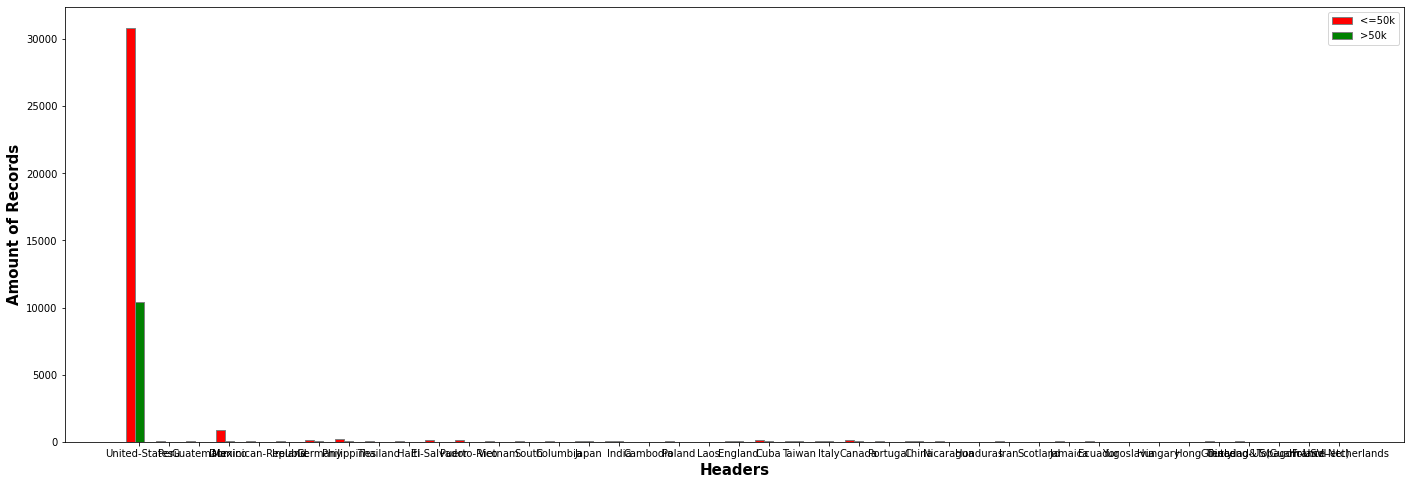

In [18]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.3
fig = plt.subplots(figsize =(24, 8))
arr_len = len(incomes_by_country)

income_more_50, income_less_50 = [], []
for x, y in incomes_by_country:
  income_less_50.append(x)
  income_more_50.append(y)

br1 = np.arange(arr_len)
br2 = [x + barWidth for x in br1]

plt.bar(br1, income_less_50, color ='r', width = barWidth,
		edgecolor ='grey', label ='<=50k')
plt.bar(br2, income_more_50, color ='g', width = barWidth,
		edgecolor ='grey', label ='>50k')

plt.xlabel('Headers', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of Records', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(arr_len)], clean_data["native-country"].unique())

plt.legend()
plt.show()

Так как для USA количество значений гораздо больше чем для других стран, у нас получился такой график. Посмотрим как ведет себя график без USA.

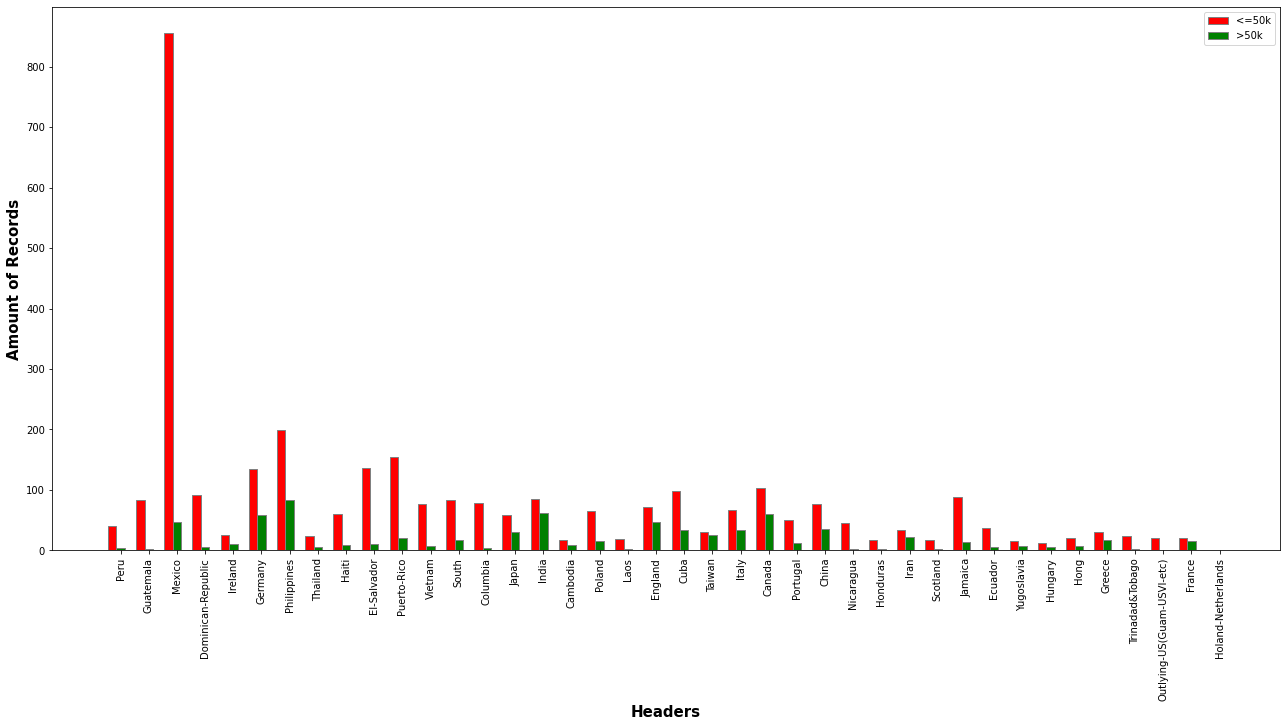

In [19]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.3
fig = plt.subplots(figsize =(22, 10))
arr_len = len(incomes_by_country) - 1

income_more_50, income_less_50 = [], []
for x, y in incomes_by_country:
  income_less_50.append(x)
  income_more_50.append(y)

br1 = np.arange(arr_len)
br2 = [x + barWidth for x in br1]

plt.bar(br1, income_less_50[1:], color ='r', width = barWidth,
		edgecolor ='grey', label ='<=50k')
plt.bar(br2, income_more_50[1:], color ='g', width = barWidth,
		edgecolor ='grey', label ='>50k')

plt.xlabel('Headers', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of Records', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(arr_len)], clean_data["native-country"].unique()[1:])
plt.xticks(rotation=90)

plt.legend()
plt.show()

График стал выглядеть лучше но не сильно. Нормализуем все значения от 0 до 1 и посмотрим на процентное соотношение по странам.

In [20]:
normalized_incomes_by_country = [(x/(x+y), y/(x+y)) for x, y in incomes_by_country]
normalized_incomes_by_country

[(0.7469727792308437, 0.25302722076915624),
 (0.9111111111111111, 0.08888888888888889),
 (0.9651162790697675, 0.03488372093023256),
 (0.9479512735326688, 0.05204872646733112),
 (0.9484536082474226, 0.05154639175257732),
 (0.7222222222222222, 0.2777777777777778),
 (0.6994818652849741, 0.3005181347150259),
 (0.7031802120141343, 0.2968197879858657),
 (0.8275862068965517, 0.1724137931034483),
 (0.8695652173913043, 0.13043478260869565),
 (0.9251700680272109, 0.07482993197278912),
 (0.8857142857142857, 0.11428571428571428),
 (0.9156626506024096, 0.08433734939759036),
 (0.8217821782178217, 0.1782178217821782),
 (0.9512195121951219, 0.04878048780487805),
 (0.651685393258427, 0.34831460674157305),
 (0.5782312925170068, 0.4217687074829932),
 (0.6538461538461539, 0.34615384615384615),
 (0.8024691358024691, 0.19753086419753085),
 (0.9047619047619048, 0.09523809523809523),
 (0.6050420168067226, 0.3949579831932773),
 (0.7443609022556391, 0.2556390977443609),
 (0.5454545454545454, 0.45454545454545453

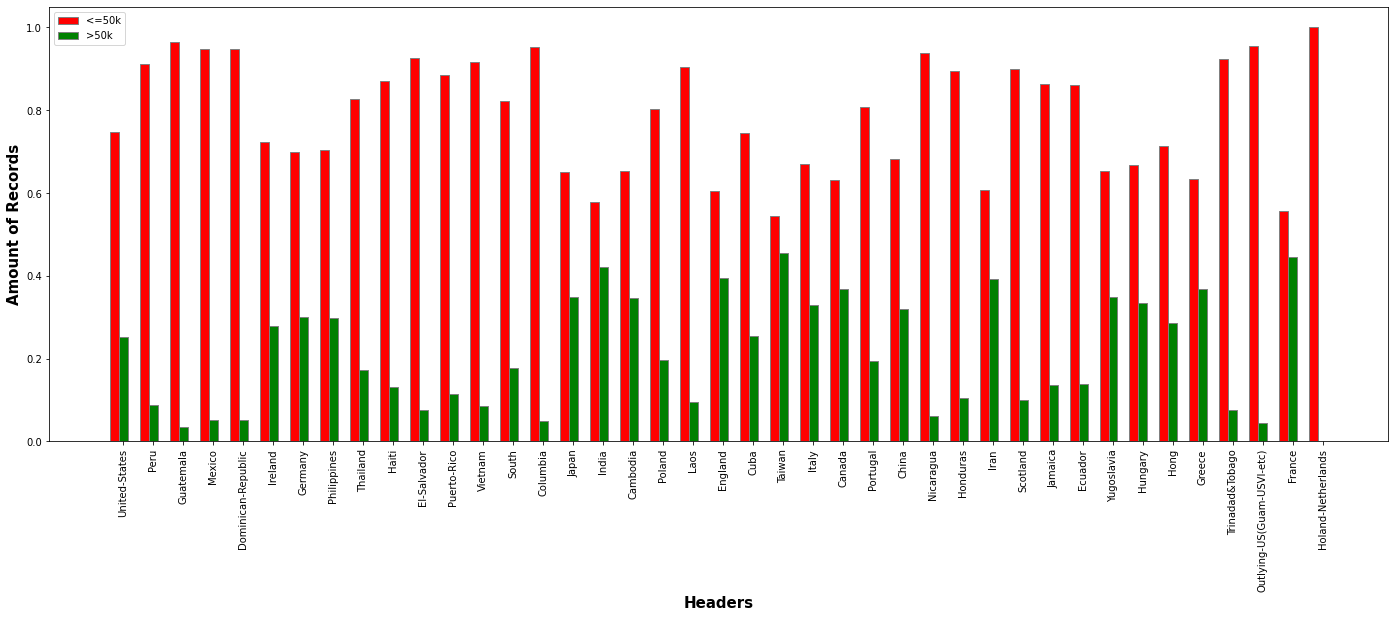

In [21]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.3
fig = plt.subplots(figsize =(24, 8))
arr_len = len(incomes_by_country)

income_more_50, income_less_50 = [], []
for x, y in normalized_incomes_by_country:
  income_less_50.append(x)
  income_more_50.append(y)

br1 = np.arange(arr_len)
br2 = [x + barWidth for x in br1]

plt.bar(br1, income_less_50, color ='r', width = barWidth,
		edgecolor ='grey', label ='<=50k')
plt.bar(br2, income_more_50, color ='g', width = barWidth,
		edgecolor ='grey', label ='>50k')

plt.xlabel('Headers', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of Records', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(arr_len)], clean_data["native-country"].unique())
plt.xticks(rotation=90)

plt.legend()
plt.show()

По данным из графика видно что в Тайфване, Индии, Франции и Иране соотношение зарплат стремится к 50/50 (но этого не достигается). Для наглядности можно построить другой график

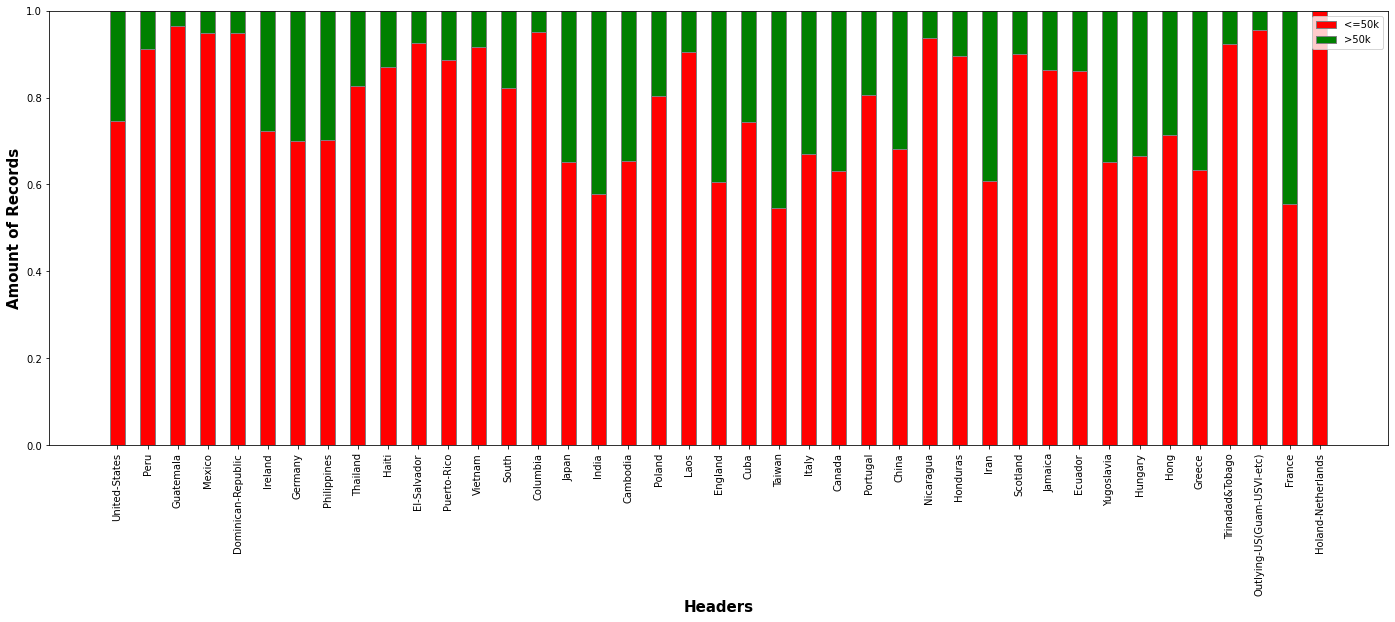

In [22]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.5
fig = plt.subplots(figsize =(24, 8))
arr_len = len(normalized_incomes_by_country)

income_more_50, income_less_50 = [], []
for x, y in normalized_incomes_by_country:
  income_less_50.append(x)
  income_more_50.append(y)

br = np.arange(arr_len)

plt.bar(br, income_less_50, color ='r', width = barWidth,
		edgecolor ='grey', label ='<=50k')
plt.bar(br, income_more_50, color ='g', width = barWidth,
		edgecolor ='grey', label ='>50k', bottom=income_less_50)

plt.xlabel('Headers', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of Records', fontweight ='bold', fontsize = 15)
plt.xticks(br, clean_data["native-country"].unique())
plt.xticks(rotation=90)

plt.legend()
plt.show()

In [23]:
clean_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## **Логистическая регрессия**

Преобразуем все категориальные признаки в числовые а столбец 'income' вынесем отдельно в переменную Y.

In [59]:
X = pd.get_dummies(clean_data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
del X['income']
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Преобразуем столбец Income в числовое значение 0 или 1 с помощью LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(clean_data['income'])
Y = pd.Series(data=le.transform(clean_data['income']))
Y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

Создадим пайплайн для удобства вызова

In [50]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

Создадим обучающую и тестовую выборки

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [62]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

Оценим качество моделей на тренировочных данных и тестовых. Как видим результаты отличаются на 0,008

In [63]:
model.score(X_train, y_train) 

0.8512314453934821

In [64]:
model.score(X_test, y_test) 

0.8435599778883361

Можно посмотреть с какой вероятностью иодель выбирала то или иное значение.

In [65]:
model.predict_proba(X_test)

array([[0.92061504, 0.07938496],
       [0.97994   , 0.02006   ],
       [0.70466542, 0.29533458],
       ...,
       [0.94857052, 0.05142948],
       [0.93509437, 0.06490563],
       [0.90486374, 0.09513626]])

## **Метод опорных векторов**

Создадим пайплайн на методе опорных векторов и обучим модель.

In [67]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Посмотрим на точность предсказания на обучающей и тестовой выборке

In [70]:
clf.score(X_train, y_train) 

0.8601597700196257

In [71]:
clf.score(X_test, y_test)

0.8402432283029297

## **Выводы**

### 1) В работе были разобраны методы анализа данных, их визуализации, обработки и базовые методы машинного обучения для предсказания дохода.

### 2) В качестве обработки данных были следующие шаги: поиск нулевых значений, удаление строк содержащих нулевые значения, преобразование категориальных столбцов в числовые, 

### 3) При сравнении двух моделей можно понять что модель логистической регресии справилась лучше чем модель опорных векторов. (лучше на 0,003). Для выборки из 1000 элементов мы получим разницу в +-3 правильно распознанных элементов. Но в выборке в 100_000 вы получим уже разницу в 300 элементов. Что может иметь для нас значение. Так же возможно в датасете есть столбцы которые создают лишний шум (не коррелируют с целевым столбцом) из-за чего алгоритмы могут работать хуже. 

### 4) 84% правильных ответов это хороший результат для тестовых моделей. Для оценки закономерностей и зависимостей. Но такую модель нельзя использовать для реальных задач. Для увеличения точности модели можно оценить корреляцию и отобрать ограничений список признаков и обучить модель на этих признаках и оценить результат. Также стоит оценить полноту данных - возможно нам нужна модель для предсказания зарплаты только в США тогда остальные страны превносят только шум в данные, или мы хотим предсказывать зп в стране которой нет в списке, тогда таки данные нам тоже не подходят. Также можно выбрать другие модели для оценки предсказаний.